<a href="https://colab.research.google.com/github/do71730/ling490/blob/main/LING_490_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Lab #4

Lab #4 follows the format of chapter 3 in the NLTK book

In [ ]:
    # NLTK Book Chapter 3 available here: https://www.nltk.org/book/ch03.html
# You can follow along with the book and run the code that it shows from this file
# You can then modify the code so you can search for the items of your choice
# There is a lot of extra material here, but you need to do the 5 EXERCISES to
# complete the lab.
# The EXERCISES are found throughout the lab. They appear in context.
# I will also upload a video walk-through for the EXERCISES to provide a model.

Chapter 3 - Processing Raw Text

The most important source of texts is undoubtedly the Web. It's convenient to have existing text collections<br>
to explore, such as the corpora we saw in the previous chapters. However, you probably have your own text sources<br>
in mind, and need to learn how to access them.

The goal of this chapter is to answer the following questions:

In [ ]:
    # 1. How can we write programs to access text from local files and from the web, in order to get hold
        # of an unlimited range of language material?
    # 2. How can we split documents up into individual words and punctuation symbols, so we can carry out
        # the same kinds of analysis we did with text corpora in earlier chapters?
    # 3. How can we search for parts of words?

In order to address these questions, we will be covering key concepts in NLP, including tokenization,<br>
stemming, lemmatization, and POS tagging.

Chapter Outline

3.1 Accessing Text from the Web and from Disk

In [ ]:
    # Electronic books
    # Dealing with HTML
    # Reading Local Files

3.4 Regular Expressions for Detecting Word Patterns

In [ ]:
    # Using Basic Meta-Characters

3.6 Normalizing Text

In [ ]:
    # Stemmers
    # Lemmatization
    # POS tagging

3.1 Accessing Text from the Web and from Disk

Electronic Books

In [2]:
import nltk, re, pprint
#nltk.download()
from nltk import word_tokenize

EXERCISE #1<br>
Access a text of your choice at "Project Gutenberg"<br>
You need the number of the text to access it<br>
Perform some analyses on it. Include in your analyses at least the following things:

In [ ]:
    # Pre-processing
        # Make all words lowercase
        # Tokenize the text into words
        # Tokenize the text into sentences
        # Use the WordNet lemmatizer or a word stemmer in NLTK to get the lemmas or stems of the words in the text
        # Use a POS tagger to tag words for POS (Parts of speech)

    # Fun functions
        # Get a set of 20 collocations
        # With and without stopwords
        # Get the frequency distribution of the 50 most frequent words in the text.
        # Plot the distribution.
        # Get the frequency distribution of the 50 most frequent lemmas or stems in the text.
        # Get the lexical diversity of the text
        # Get the lexical dispersion of a selection of words and plot the results.

The code below can be changed to help with your search

In [4]:
from urllib import request
url = "https://www.gutenberg.org/cache/epub/67785/pg67785.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(type(raw))
print(len(raw))
print(raw[:59])

<class 'str'>
276392
﻿The Project Gutenberg eBook of The Cat, by Violet Hunt




You will need NLTK and the word_tokenize and sent_tokenize functions from NLTK

In [5]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

Pre-processing

Make all words lowercase

In [7]:
raw_lower = raw.lower()
print(raw_lower[:59])
print(len(raw))

﻿the project gutenberg ebook of the cat, by violet hunt


276392


Tokenize the lowercase text into words

In [10]:
nltk.download('punkt')
words = word_tokenize(raw_lower)
print(len(words))
print(words[:20])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
60052
['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'the', 'cat', ',', 'by', 'violet', 'hunt', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere']


Tokenize the lowercase text into sentences

In [11]:
sentences = sent_tokenize(raw_lower)
print(sentences[:10])
print(len(sentences))

['\ufeffthe project gutenberg ebook of the cat, by violet hunt\r\n\r\nthis ebook is for the use of anyone anywhere in the united states and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever.', 'you may copy it, give it away or re-use it under the terms\r\nof the project gutenberg license included with this ebook or online at\r\nwww.gutenberg.org.', 'if you are not located in the united states, you\r\nwill have to check the laws of the country where you are located before\r\nusing this ebook.', 'title: the cat\r\n       animal autobiographies\r\n\r\nauthor: violet hunt\r\n\r\nrelease date: april 6, 2022 [ebook #67785]\r\n\r\nlanguage: english\r\n\r\nproduced by: charlene taylor, mary meehan and the online distributed\r\n             proofreading team at https://www.pgdp.net (this file was\r\n             produced from images generously made available by the\r\n             internet archive/american libraries.)', "*** start of the project gutenberg

Use the WordNet Lemmatizer or a word stemmer in NLTK to get the lemmas or stems of the words in the text<br>
Let's use the WordNet Lemmatizer first, then we can compare it to the Porter Stemmer and the Lancaster Stemmer<br>
to see which works best for our objectives

WordNet Lemmatizer

In [12]:
nltk.download('wordnet')
word_net_lemmatizer = nltk.WordNetLemmatizer()
words_lemmas_WordNet = [word_net_lemmatizer.lemmatize(t) for t in words]
print(words_lemmas_WordNet[:50])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'the', 'cat', ',', 'by', 'violet', 'hunt', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'state', 'and', 'most', 'other', 'part', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restriction', 'whatsoever', '.', 'you', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or']


Now let's try to lemmatize the words with the PorterStemmer and compare the first 50 lemmas to those of<br>
the WordNet Lemmatizer

In [13]:
porter_stemmer = nltk.PorterStemmer()
words_lemmas_porter = [porter_stemmer.stem(t) for t in words]
print(words_lemmas_porter[:50])

['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'the', 'cat', ',', 'by', 'violet', 'hunt', 'thi', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyon', 'anywher', 'in', 'the', 'unit', 'state', 'and', 'most', 'other', 'part', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrict', 'whatsoev', '.', 'you', 'may', 'copi', 'it', ',', 'give', 'it', 'away', 'or']


And now with the LancasterStemmer

In [14]:
lancaster_stemmer = nltk.LancasterStemmer()
words_lemmas_lancaster = [lancaster_stemmer.stem(t) for t in words]
print(words_lemmas_lancaster[:50])

['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'the', 'cat', ',', 'by', 'violet', 'hunt', 'thi', 'ebook', 'is', 'for', 'the', 'us', 'of', 'anyon', 'anywh', 'in', 'the', 'unit', 'stat', 'and', 'most', 'oth', 'part', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrict', 'whatsoev', '.', 'you', 'may', 'cop', 'it', ',', 'giv', 'it', 'away', 'or']


POS Taggers in NLTK

In [15]:
nltk.download('averaged_perceptron_tagger')
words_POS = nltk.pos_tag(words)
print(words_POS[:50])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[('\ufeffthe', 'NN'), ('project', 'NN'), ('gutenberg', 'JJ'), ('ebook', 'NN'), ('of', 'IN'), ('the', 'DT'), ('cat', 'NN'), (',', ','), ('by', 'IN'), ('violet', 'NN'), ('hunt', 'NN'), ('this', 'DT'), ('ebook', 'NN'), ('is', 'VBZ'), ('for', 'IN'), ('the', 'DT'), ('use', 'NN'), ('of', 'IN'), ('anyone', 'NN'), ('anywhere', 'RB'), ('in', 'IN'), ('the', 'DT'), ('united', 'JJ'), ('states', 'NNS'), ('and', 'CC'), ('most', 'JJS'), ('other', 'JJ'), ('parts', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('world', 'NN'), ('at', 'IN'), ('no', 'DT'), ('cost', 'NN'), ('and', 'CC'), ('with', 'IN'), ('almost', 'RB'), ('no', 'DT'), ('restrictions', 'NNS'), ('whatsoever', 'RB'), ('.', '.'), ('you', 'PRP'), ('may', 'MD'), ('copy', 'VB'), ('it', 'PRP'), (',', ','), ('give', 'VB'), ('it', 'PRP'), ('away', 'RB'), ('or', 'CC')]


Fun functions<br>
Get a set of 20 collocations<br>
With and without stopwords

Step 1<br>
Import the collocation functions from nltk. The * means that we want everything in the 'collocations' functions

In [16]:
from nltk.collocations import *

Import tools from NLTK to find bigrams and association measures between words

In [17]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

Step 2<br>
Find collocations in the text of your choice<br>
Find bigrams, which are pairs of words, and ask for 20 collocations

In [18]:
finder = BigramCollocationFinder.from_words(words)
finder.nbest(BigramAssocMeasures.likelihood_ratio, 20)

[('auntie', 'may'),
 (',', 'and'),
 ('!', "'"),
 (',', 'but'),
 ('mr.', 'fox'),
 ('project', 'gutenberg-tm'),
 ('?', "'"),
 ("'", 'said'),
 ('do', "n't"),
 ('.', 'i'),
 ('in', 'the'),
 ('it', 'was'),
 ('did', "n't"),
 ('mrs.', 'gilmour'),
 ('of', 'the'),
 ('project', 'gutenberg'),
 ('i', 'am'),
 ('used', 'to'),
 ('.', "'"),
 ('had', 'been')]

In [19]:
print(finder.nbest(BigramAssocMeasures.likelihood_ratio, 20))

[('auntie', 'may'), (',', 'and'), ('!', "'"), (',', 'but'), ('mr.', 'fox'), ('project', 'gutenberg-tm'), ('?', "'"), ("'", 'said'), ('do', "n't"), ('.', 'i'), ('in', 'the'), ('it', 'was'), ('did', "n't"), ('mrs.', 'gilmour'), ('of', 'the'), ('project', 'gutenberg'), ('i', 'am'), ('used', 'to'), ('.', "'"), ('had', 'been')]


Step 3<br>
Let's eliminate the stopwords<br>
The output looks much better and the collocations seem much more likely

In [20]:
from nltk.corpus import stopwords

In [22]:
nltk.download('stopwords')
stopset = set(stopwords.words('english'))
filter_stops = lambda w: len(w) < 3 or w in stopset
finder.apply_word_filter(filter_stops)
finder.nbest(BigramAssocMeasures.likelihood_ratio, 20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('auntie', 'may'),
 ('mr.', 'fox'),
 ('project', 'gutenberg-tm'),
 ('mrs.', 'gilmour'),
 ('project', 'gutenberg'),
 ('united', 'states'),
 ('literary', 'archive'),
 ('gutenberg-tm', 'electronic'),
 ('electronic', 'works'),
 ('archive', 'foundation'),
 ('gutenberg', 'literary'),
 ('black', 'cat'),
 ('mr.', 'graham'),
 ('mrs.', 'jay'),
 ('admiral', 'togo'),
 ('hind', 'legs'),
 ('set', 'forth'),
 ('sure', 'enough'),
 ('said', 'auntie'),
 ('egerton', 'gardens')]

In [23]:
print(finder.nbest(BigramAssocMeasures.likelihood_ratio, 20))

[('auntie', 'may'), ('mr.', 'fox'), ('project', 'gutenberg-tm'), ('mrs.', 'gilmour'), ('project', 'gutenberg'), ('united', 'states'), ('literary', 'archive'), ('gutenberg-tm', 'electronic'), ('electronic', 'works'), ('archive', 'foundation'), ('gutenberg', 'literary'), ('black', 'cat'), ('mr.', 'graham'), ('mrs.', 'jay'), ('admiral', 'togo'), ('hind', 'legs'), ('set', 'forth'), ('sure', 'enough'), ('said', 'auntie'), ('egerton', 'gardens')]


Get the frequency distribution of the 50 most frequent words in the text.

In [24]:
fdist1 = nltk.FreqDist(words)
#print(fdist1)
print(fdist1.most_common(50))

[(',', 3797), ('.', 2339), ('and', 1922), ('the', 1889), ('to', 1488), ('i', 1243), ('a', 1083), ('of', 1035), ('she', 852), ('was', 806), ('it', 797), ("'", 782), ('in', 713), ('that', 683), ('her', 641), ('you', 549), ('he', 468), ('had', 436), ('for', 432), ('!', 416), ('may', 412), ('said', 406), ('me', 390), ('is', 378), ('not', 366), ("n't", 366), ('auntie', 360), ('with', 359), ('as', 357), ('but', 341), ('on', 335), ('all', 313), ('they', 304), ('at', 287), ('--', 275), ('have', 268), ('we', 265), ('do', 265), ('my', 263), ('so', 255), ("'s", 241), ('out', 239), ('him', 231), ('up', 229), ('or', 223), ('when', 223), ('?', 223), ('be', 218), ('mother', 214), ('if', 202)]


Plot the distribution.

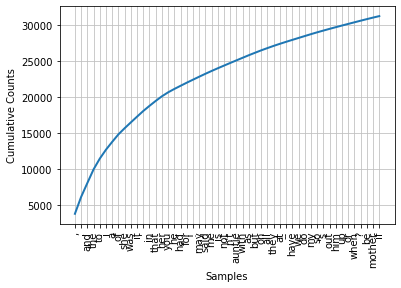

None


In [25]:
print(fdist1.plot(50, cumulative=True))

Get the frequency distribution of the 50 most frequent lemmas or stems in the text.

In [26]:
fdist2 = nltk.FreqDist(words_lemmas_WordNet)
#print(fdist2)
print(fdist2.most_common(50))

[(',', 3797), ('.', 2339), ('and', 1922), ('the', 1889), ('to', 1488), ('a', 1440), ('i', 1243), ('of', 1035), ('she', 852), ('it', 825), ('wa', 806), ("'", 782), ('in', 713), ('that', 683), ('her', 641), ('you', 549), ('he', 468), ('had', 436), ('for', 432), ('!', 416), ('may', 412), ('said', 406), ('me', 390), ('is', 378), ('not', 366), ("n't", 366), ('auntie', 360), ('with', 359), ('but', 341), ('on', 335), ('all', 313), ('they', 304), ('at', 287), ('--', 275), ('have', 268), ('we', 265), ('do', 265), ('my', 263), ('so', 255), ('cat', 250), ("'s", 241), ('out', 239), ('him', 231), ('up', 229), ('or', 223), ('when', 223), ('?', 223), ('be', 218), ('mother', 216), ('if', 202)]


Plot the distribution.

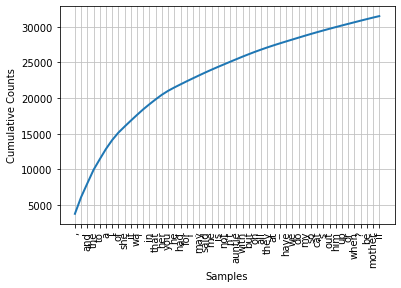

None


In [27]:
print(fdist2.plot(50, cumulative=True))

Get the lexical diversity of the text

In [28]:
def lexical_diversity(text):
    return len(text) / len(set(text))

Try your function out on "words"

In [29]:
print(lexical_diversity(words))

11.451563691838292


Get the lexical dispersion of a selection of words and plot the results.<br>
Create an NLTK text from the list of words<br>
This allows us to perform all the functions we saw in Chapter 1 and Lab #2

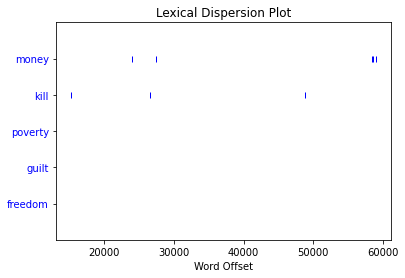

None


In [30]:
words = nltk.Text(words)
print(words.dispersion_plot(["money", "kill", "poverty", "guilt", "freedom"]))

Dealing with HTML<br>
We need to know about this if we get text from websites

EXERCISE #2<br>
Access a website of your choice and try to extract the text from it

In [35]:
    # Do this manually first by finding a website to go to in your browser. Sometimes it helps to see
    # the source of the text you are looking for
    # The code below can be changed to help with your search
# Access the webpage and get the content
from bs4 import BeautifulSoup
from urllib import request
url = "http://www.balloon-party.it/it/873-palloncini-12-30cm"
response = request.urlopen(url).read().decode('utf8')
raw = BeautifulSoup(response, 'html.parser')


Use BeautifulSoup to extract text from html

In [36]:
name = []
price = []
for i in raw.find_all('h2',class_ = "h3 product-title"):
  m = i.getText()
  name.append(m)

for p in raw.find_all('span',class_="price"):
  n = p.getText().replace('\xa0','')
  price.append(n)



In [38]:
import pandas as pd
df = pd.DataFrame(list(zip(name, price)),columns =['Name', 'Price'])
df

,Name,Price
0,"Palloncino 11"" Colori Pastello ""Balloons Paste...","8,37€"
1,"Palloncino 12"" G110 Macaron Assortito ""Assorte...","8,10€"
2,"Palloncino 12"" G110 Assortito ""Naturals"" 100pz","8,10€"
3,"Palloncino 12"" G110 Neon Assortito ""Neon"" 100pz","8,18€"
4,"Palloncino 12"" G110 Crystal Assortito ""Crystal...","8,18€"
5,"Palloncino 11"" Bianco Pastello ""Balloons White...","8,37€"
6,"Palloncino 12"" G110 Bianco ""White 001"" 100pz","8,10€"
7,"Palloncino 12"" G110 Latte ""Milk 084"" 100pz","8,10€"
8,"Palloncino 12"" G110 Giallo Mostarda ""Yellow 04...","8,10€"
9,"Palloncino 12"" G110 Giallo ""Yellow 002"" 100pz","8,10€"


Reading Local Files

In order to read a local file, we need to use Python's built-in open() function,<br>
followed by the read() method. Suppose you have a file document.txt, you can load<br>
its contents like this:

HEADS UP!<br>
There are two files you can load here, both are tweets about COVID-19 that I downloaded in March.<br>
HOWEVER, the file "lotta_tweets.csv" is a large file containing some 1.8 million tweets. It will take<br>
time for Python to process the text. For example, to run the code below this line with the 1.8 million tweets,<br>
which is about 61 million words, took my computer about 1 hour.<br>
You can try it with either file or both, but I just wanted to let you know about the time required to<br>
process the large file, tokenize it, stem it, lemmatize it, etc.<br>
If you run the code as you find it here, you can see that the "few_tweets.rtf" file will be opened and the<br>
100 tweets containing the word "rona"

In [39]:
My_file = open("few_tweets.csv")
raw = My_file.read()

NOTE:

EXERCISE #3<br>
Accessing local files from your computer<br>
Access the file "few_tweets.csv"<br>
Perform some analyses on it. Include in your analyses at least the following things:

In [ ]:
    # Pre-processing
        # Make all words lowercase
        # Tokenize the text into words
        # Remove punctuation
        # Remove stopwords
        # Tokenize the text into sentences
        # Use the WordNet lemmatizer or a word stemmer in NLTK to get the lemmas or stems of the words in the text
        # Use a POS tagger to tag words for POS (Parts of speech)
    # Fun functions
        # Get a set of 20 collocations
        # With and without stopwords
        # Get the frequency distribution of the 50 most frequent words in the text.
        # Plot the distribution.
        # Get the frequency distribution of the 50 most frequent lemmas or stems in the text.
        # Get the lexical diversity of the text
        # Get the lexical dispersion of a selection of words and plot the results.

You can do the work for EXERCISE #3 below

You will need NLTK and the word_tokenize and sent_tokenize functions from NLTK

Pre-processing

Make all words lowercase

In [40]:
raw = raw.lower()
print(raw[:280])
print(len(raw))

,text,,
1,"staring: rona... action, drama, and suspense 🎬 https://t.co/jrnphgphx3",,
2,if my driving test gets cancelled because miss rona wants to move mad i’m actually gonna drive anyway. the police will be busy dealing with the revolution anyway so.... https://t.co/dss0p4ujml,
9079


Tokenize the lowercase text into words

In [41]:
Tweets_words = word_tokenize(raw)
print(Tweets_words[:280])
print(len(Tweets_words))

[',', 'text', ',', ',', '1', ',', "''", 'staring', ':', 'rona', '...', 'action', ',', 'drama', ',', 'and', 'suspense', '🎬', 'https', ':', '//t.co/jrnphgphx3', "''", ',', ',', '2', ',', 'if', 'my', 'driving', 'test', 'gets', 'cancelled', 'because', 'miss', 'rona', 'wants', 'to', 'move', 'mad', 'i', '’', 'm', 'actually', 'gon', 'na', 'drive', 'anyway', '.', 'the', 'police', 'will', 'be', 'busy', 'dealing', 'with', 'the', 'revolution', 'anyway', 'so', '...', '.', 'https', ':', '//t.co/dss0p4ujml', ',', ',', '3', ',', 'aaron', 'rodgers', 'get', 'that', 'rona', 'i', '’', 'm', 'dropping', '81', 'on', 'his', 'head', 'nigga', ',', ',', '4', ',', 'good', 'old', 'rona', 'sorted', 'me', 'right', 'out', 'here', 'https', ':', '//t.co/xadli1cnhp', ',', ',', '5', ',', 'on', 'top', 'of', 'rona', 'the', 'pollen', 'out', 'here', 'like', 'https', ':', '//t.co/s6jynjr1tg', ',', ',', '6', ',', 'after', 'reading', 'this', 'i', 'think', 'i', 'may', 'have', 'had', 'that', 'rona', 'back', 'in', 'january', '.',

Remove punctuation

In [44]:
import string
def remove_punctuation(text):
    text_nopunct = [c for c in text if c not in string.punctuation]
    return text_nopunct
# Call the function on a specific text
Tweets_words = remove_punctuation(Tweets_words)
print(Tweets_words)

['text', '1', "''", 'staring', 'rona', '...', 'action', 'drama', 'suspense', '🎬', 'https', '//t.co/jrnphgphx3', "''", '2', 'driving', 'test', 'gets', 'cancelled', 'miss', 'rona', 'wants', 'move', 'mad', '’', 'actually', 'gon', 'na', 'drive', 'anyway', 'police', 'busy', 'dealing', 'revolution', 'anyway', '...', 'https', '//t.co/dss0p4ujml', '3', 'aaron', 'rodgers', 'get', 'rona', '’', 'dropping', '81', 'head', 'nigga', '4', 'good', 'old', 'rona', 'sorted', 'right', 'https', '//t.co/xadli1cnhp', '5', 'top', 'rona', 'pollen', 'like', 'https', '//t.co/s6jynjr1tg', '6', 'reading', 'think', 'may', 'rona', 'back', 'january', 'symptoms', 'ended', 'whatever', 'infecting', 'dissolving', 'benign', 'breast', 'tumor', '’', 'months', 'doctors', 'said', '’', 'get', 'surgically', 'removed', '...', 'medical', 'twitter', 'u', 'explain', 'https', '//t.co/jvyemqunz3', '7', "''", '12,000', 'confirmed', 'rona', 'cases', 'reach', 'abt', '30,000', "''", '8', 'ramosmelissaaa', 'yeah', 'getting', 'rona', '9', '

Remove stopwords

In [45]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
Tweets_words = [w for w in Tweets_words if not w in stop_words]
print(Tweets_words)

['text', '1', "''", 'staring', 'rona', '...', 'action', 'drama', 'suspense', '🎬', 'https', '//t.co/jrnphgphx3', "''", '2', 'driving', 'test', 'gets', 'cancelled', 'miss', 'rona', 'wants', 'move', 'mad', '’', 'actually', 'gon', 'na', 'drive', 'anyway', 'police', 'busy', 'dealing', 'revolution', 'anyway', '...', 'https', '//t.co/dss0p4ujml', '3', 'aaron', 'rodgers', 'get', 'rona', '’', 'dropping', '81', 'head', 'nigga', '4', 'good', 'old', 'rona', 'sorted', 'right', 'https', '//t.co/xadli1cnhp', '5', 'top', 'rona', 'pollen', 'like', 'https', '//t.co/s6jynjr1tg', '6', 'reading', 'think', 'may', 'rona', 'back', 'january', 'symptoms', 'ended', 'whatever', 'infecting', 'dissolving', 'benign', 'breast', 'tumor', '’', 'months', 'doctors', 'said', '’', 'get', 'surgically', 'removed', '...', 'medical', 'twitter', 'u', 'explain', 'https', '//t.co/jvyemqunz3', '7', "''", '12,000', 'confirmed', 'rona', 'cases', 'reach', 'abt', '30,000', "''", '8', 'ramosmelissaaa', 'yeah', 'getting', 'rona', '9', '

Tokenize the lowercase text into sentences

In [46]:
Tweets_sentences = sent_tokenize(raw)
print(Tweets_sentences[:20])
print(len(Tweets_sentences))

[',text,,\n1,"staring: rona... action, drama, and suspense 🎬 https://t.co/jrnphgphx3",,\n2,if my driving test gets cancelled because miss rona wants to move mad i’m actually gonna drive anyway.', 'the police will be busy dealing with the revolution anyway so.... https://t.co/dss0p4ujml,,\n3,aaron rodgers get that rona i’m dropping 81 on his head nigga,,\n4,good old rona sorted me right out here https://t.co/xadli1cnhp,,\n5,on top of rona the pollen out here like https://t.co/s6jynjr1tg,,\n6,after reading this i think i may have had that rona back in january.', 'same symptoms as here but it ended with whatever was infecting me dissolving a benign breast tumor i’d had for months that doctors said i’d have to get surgically removed... medical twitter can u explain?', 'https://t.co/jvyemqunz3,,\n7,"12,000 confirmed rona cases.', 'it will reach abt 30,000",,\n8,@ramosmelissaaa yeah you getting the rona,,\n9,sierra leone has 0 rona cases???', 'https://t.co/mn8npnqwuy,,\n10,big rona don\'t st

Use the WordNet Lemmatizer or a word stemmer in NLTK to get the lemmas or stems of the words in the text<br>
Let's use the WordNet Lemmatizer first, then we can compare it to the Porter Stemmer and the Lancaster Stemmer<br>
to see which works best for our objectives

WordNet Lemmatizer

In [47]:
word_net_lemmatizer = nltk.WordNetLemmatizer()
Tweets_lemmas_WordNet = [word_net_lemmatizer.lemmatize(t) for t in Tweets_words]
print(Tweets_lemmas_WordNet[:50])

['text', '1', "''", 'staring', 'rona', '...', 'action', 'drama', 'suspense', '🎬', 'http', '//t.co/jrnphgphx3', "''", '2', 'driving', 'test', 'get', 'cancelled', 'miss', 'rona', 'want', 'move', 'mad', '’', 'actually', 'gon', 'na', 'drive', 'anyway', 'police', 'busy', 'dealing', 'revolution', 'anyway', '...', 'http', '//t.co/dss0p4ujml', '3', 'aaron', 'rodgers', 'get', 'rona', '’', 'dropping', '81', 'head', 'nigga', '4', 'good', 'old']


Now let's try to lemmatize the tweets with the PorterStemmer and compare the first 50 lemmas to those of<br>
the WordNet Lemmatizer

In [48]:
porter_stemmer = nltk.PorterStemmer()
Tweets_lemmas_porter = [porter_stemmer.stem(t) for t in Tweets_words]
print(Tweets_lemmas_porter[:50])

['text', '1', "''", 'stare', 'rona', '...', 'action', 'drama', 'suspens', '🎬', 'http', '//t.co/jrnphgphx3', "''", '2', 'drive', 'test', 'get', 'cancel', 'miss', 'rona', 'want', 'move', 'mad', '’', 'actual', 'gon', 'na', 'drive', 'anyway', 'polic', 'busi', 'deal', 'revolut', 'anyway', '...', 'http', '//t.co/dss0p4ujml', '3', 'aaron', 'rodger', 'get', 'rona', '’', 'drop', '81', 'head', 'nigga', '4', 'good', 'old']


And now with the LancasterStemmer

In [49]:
lancaster_stemmer = nltk.LancasterStemmer()
Tweets_lemmas_lancaster = [lancaster_stemmer.stem(t) for t in Tweets_words]
print(Tweets_lemmas_lancaster[:50])

['text', '1', "''", 'star', 'ron', '...', 'act', 'dram', 'suspens', '🎬', 'https', '//t.co/jrnphgphx3', "''", '2', 'driv', 'test', 'get', 'cancel', 'miss', 'ron', 'want', 'mov', 'mad', '’', 'act', 'gon', 'na', 'driv', 'anyway', 'pol', 'busy', 'deal', 'revolv', 'anyway', '...', 'https', '//t.co/dss0p4ujml', '3', 'aaron', 'rodg', 'get', 'ron', '’', 'drop', '81', 'head', 'nigg', '4', 'good', 'old']


Fun functions<br>
Get a set of 20 collocations<br>
With and without stopwords

Step 1<br>
Import the collocation functions from nltk. The * means that we want everything in the 'collocations' functions

In [50]:
from nltk.collocations import *

Import tools from NLTK to find bigrams and association measures between words

In [51]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

Step 2<br>
Find collocations in the text Tweets_words<br>
Find bigrams, which are pairs of words, and ask for 20 collocations

In [52]:
finder = BigramCollocationFinder.from_words(Tweets_words)
finder.nbest(BigramAssocMeasures.likelihood_ratio, 20)

[('pulling', 'spring'),
 ('spring', 'break'),
 ('freestyle', '🦠'),
 ('sean', 'payton'),
 ('miss', 'rona'),
 ('papoose', '‘'),
 ('https', '//t.co/rhwbnuwcxo'),
 ('action', 'drama'),
 ('drama', 'suspense'),
 ('patrick', 'mahomes'),
 ('suspense', '🎬'),
 ('break', 'https'),
 ('got', 'fucked'),
 ('81', 'head'),
 ('aaron', 'rodgers'),
 ('dropping', '81'),
 ('mahomes', 'catch'),
 ('stop', 'tea'),
 ('big', 'rona'),
 ('rona', 'pulling')]

In [53]:
print(finder.nbest(BigramAssocMeasures.likelihood_ratio, 20))

[('pulling', 'spring'), ('spring', 'break'), ('freestyle', '🦠'), ('sean', 'payton'), ('miss', 'rona'), ('papoose', '‘'), ('https', '//t.co/rhwbnuwcxo'), ('action', 'drama'), ('drama', 'suspense'), ('patrick', 'mahomes'), ('suspense', '🎬'), ('break', 'https'), ('got', 'fucked'), ('81', 'head'), ('aaron', 'rodgers'), ('dropping', '81'), ('mahomes', 'catch'), ('stop', 'tea'), ('big', 'rona'), ('rona', 'pulling')]


Step 3<br>
Let's eliminate the stopwords<br>
The output looks much better and the collocations seem much more likely

In [54]:
stopset = set(stopwords.words('english'))
filter_stops = lambda w: len(w) < 3 or w in stopset
finder.apply_word_filter(filter_stops)
finder.nbest(BigramAssocMeasures.likelihood_ratio, 20)

[('pulling', 'spring'),
 ('spring', 'break'),
 ('sean', 'payton'),
 ('miss', 'rona'),
 ('https', '//t.co/rhwbnuwcxo'),
 ('action', 'drama'),
 ('drama', 'suspense'),
 ('patrick', 'mahomes'),
 ('break', 'https'),
 ('got', 'fucked'),
 ('aaron', 'rodgers'),
 ('mahomes', 'catch'),
 ('stop', 'tea'),
 ('big', 'rona'),
 ('rona', 'pulling'),
 ('covid-19', 'black'),
 ('gay', 'people'),
 ('head', 'nigga'),
 ('people', 'covid-19'),
 ('rolling', 'shit')]

In [55]:
print(finder.nbest(BigramAssocMeasures.likelihood_ratio, 20))

[('pulling', 'spring'), ('spring', 'break'), ('sean', 'payton'), ('miss', 'rona'), ('https', '//t.co/rhwbnuwcxo'), ('action', 'drama'), ('drama', 'suspense'), ('patrick', 'mahomes'), ('break', 'https'), ('got', 'fucked'), ('aaron', 'rodgers'), ('mahomes', 'catch'), ('stop', 'tea'), ('big', 'rona'), ('rona', 'pulling'), ('covid-19', 'black'), ('gay', 'people'), ('head', 'nigga'), ('people', 'covid-19'), ('rolling', 'shit')]


Get the frequency distribution of the 50 most frequent words in the text.

In [56]:
fdist1 = nltk.FreqDist(Tweets_words)
#print(fdist1)
print(fdist1.most_common(50))

[('rona', 94), ('https', 41), ("''", 40), ('’', 40), ('...', 17), ('got', 17), ('miss', 10), ('get', 9), ('``', 8), ("n't", 7), ('break', 6), ('right', 5), ('like', 5), ('big', 5), ('pulling', 5), ('spring', 5), ('//t.co/rhwbnuwcxo', 5), ('us', 5), ('nigga', 4), ('take', 4), ('people', 4), ('black', 4), ('folks', 4), ('sick', 4), ('time', 4), ('ms', 4), ('‘', 4), ('shit', 4), ('around', 4), ('k', 4), ('aaron', 3), ('81', 3), ('u', 3), ('getting', 3), ('stop', 3), ('sean', 3), ('payton', 3), ('living', 3), ('post', 3), ('never', 3), ('fucking', 3), ('fuck', 3), ('fucked', 3), ('papoose', 3), ('freestyle', 3), ('🦠', 3), ('//t.co/vfhwiskk9w', 3), ('catch', 3), ('thank', 3), ('going', 3)]


Plot the distribution.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129440 missing from current font.
  font.set_text(s, 0, flags=flags)


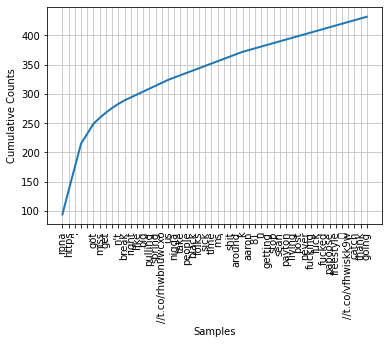

None


In [57]:
print(fdist1.plot(50, cumulative=True))

Get the frequency distribution of the 50 most frequent lemmas or stems in the text.

In [58]:
fdist2 = nltk.FreqDist(Tweets_lemmas_WordNet)
#print(fdist2)
print(fdist2.most_common(50))

[('rona', 94), ('http', 41), ("''", 40), ('’', 40), ('...', 17), ('got', 17), ('get', 10), ('miss', 10), ('u', 8), ('``', 8), ("n't", 7), ('right', 6), ('break', 6), ('nigga', 5), ('like', 5), ('big', 5), ('pulling', 5), ('spring', 5), ('//t.co/rhwbnuwcxo', 5), ('take', 4), ('people', 4), ('black', 4), ('folk', 4), ('sick', 4), ('time', 4), ('m', 4), ('‘', 4), ('catch', 4), ('shit', 4), ('around', 4), ('k', 4), ('want', 3), ('aaron', 3), ('81', 3), ('getting', 3), ('stop', 3), ('sean', 3), ('payton', 3), ('living', 3), ('post', 3), ('never', 3), ('fucking', 3), ('fuck', 3), ('fucked', 3), ('papoose', 3), ('freestyle', 3), ('🦠', 3), ('//t.co/vfhwiskk9w', 3), ('thank', 3), ('going', 3)]


Plot the distribution.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129440 missing from current font.
  font.set_text(s, 0, flags=flags)


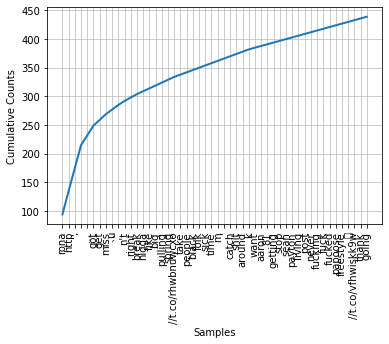

None


In [59]:
print(fdist2.plot(50, cumulative=True))

Get the lexical diversity of the text

In [60]:
def lexical_diversity(text):
    return len(text) / len(set(text))

Try your function out on "Tweets_words"

In [61]:
print(lexical_diversity(Tweets_words))

1.6147540983606556


Get the lexical dispersion of a selection of words and plot the results.<br>
This doesn't make much sense with 1.8 million tweets that are connected together as a list,<br>
but if you are analyzing one text or a series of texts like in the Inaugural Address Corpus,<br>
this function makes more sense<br>
rint(Tweets_words.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"]))

3.4 Regular Expressions for Detecting Word Patterns - Searching for parts of words

Many linguistic processing tasks involve pattern matching. For example, we can find words<br>
ending with ed using endswith('ed'). We saw a variety of such "word tests" in 4.2.<br>
Regular expressions give us a more powerful and flexible method for describing the character<br>
patterns we are interested in.

To use regular expressions in Python we need to import the re library using: import re.<br>
We also need a list of words to search; we'll use the Words Corpus again (4).<br>
We will preprocess it to remove any proper names.

In [62]:
import re
nltk.download('words')
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Let's find words ending with ed using the regular expression «ed$».<br>
We will use the re.search(p, s) function to check whether the pattern p can be found<br>
somewhere inside the string s. We need to specify the characters of interest, and use<br>
the dollar sign which has a special behavior in the context of regular expressions<br>
in that it matches the end of the word:

In [63]:
print([w for w in wordlist if re.search('ed$', w)])

['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded', 'absorbed', 'abstracted', 'abstricted', 'accelerated', 'accepted', 'accidented', 'accoladed', 'accolated', 'accomplished', 'accosted', 'accredited', 'accursed', 'accused', 'accustomed', 'acetated', 'acheweed', 'aciculated', 'aciliated', 'acknowledged', 'acorned', 'acquainted', 'acquired', 'acquisited', 'acred', 'aculeated', 'addebted', 'added', 'addicted', 'addlebrained', 'addleheaded', 'addlepated', 'addorsed', 'adempted', 'adfected', 'adjoined', 'admired', 'admitted', 'adnexed', 'adopted', 'adossed', 'adreamed', 'adscripted', 'aduncated', 'advanced', 'advised', 'aeried', 'aethered', 'afeared', 'affected', 'affectioned', 'affined', 'afflicted', 'affricated', 'affrighted', 'affronted', 'aforenamed', 'afterfeed', 'aftershafted', 'afterthoughted', 'afterwitted', 'agazed', 'aged', 'agglomerated', 'aggrieved', 'agminated', 'agnamed', 'agonied', 'agreed', 'agueweed', 'ahungere

The . wildcard symbol matches any single character. Suppose we have room in a crossword puzzle<br>
for an 8-letter word with j as its third letter and t as its sixth letter. In place of each<br>
blank cell we use a period:

In [64]:
print([w for w in wordlist if re.search('^..j..t..$', w)])

['abjectly', 'adjuster', 'dejected', 'dejectly', 'injector', 'majestic', 'objectee', 'objector', 'rejecter', 'rejector', 'unjilted', 'unjolted', 'unjustly']


Finally, the ? symbol specifies that the previous character is optional. Thus «^e-?mail$» will match<br>
both email and e-mail. We could count the total number of occurrences of this word (in either spelling)<br>
in a text using

In [80]:
print(sum(1 for w in wordlist if re.search('^e-?mail$', w)))

0


EXERCISE #4<br>
Search for parts of words.<br>
As a linguist think about prefixes and suffixes<br>
Use Table 3.3 in this chapter for a list of options<br>
Since we searched for the 'ed' suffix before, maybe you can try a prefix this time<br>
Note that the code for matching some pattern at the beginning of a word is '^' as in '^pre' to look for<br>
words that begin with 'pre'

In [66]:
print([w for w in wordlist if re.search('^pre', w)])

['preabdomen', 'preabsorb', 'preabsorbent', 'preabstract', 'preabundance', 'preabundant', 'preabundantly', 'preaccept', 'preacceptance', 'preaccess', 'preaccessible', 'preaccidental', 'preaccidentally', 'preaccommodate', 'preaccommodating', 'preaccommodatingly', 'preaccommodation', 'preaccomplish', 'preaccomplishment', 'preaccord', 'preaccordance', 'preaccount', 'preaccounting', 'preaccredit', 'preaccumulate', 'preaccumulation', 'preaccusation', 'preaccuse', 'preaccustom', 'preaccustomed', 'preacetabular', 'preach', 'preachable', 'preacher', 'preacherdom', 'preacheress', 'preacherize', 'preacherless', 'preacherling', 'preachership', 'preachieved', 'preachification', 'preachify', 'preachily', 'preachiness', 'preaching', 'preachingly', 'preachman', 'preachment', 'preachy', 'preacid', 'preacidity', 'preacidly', 'preacidness', 'preacknowledge', 'preacknowledgment', 'preacquaint', 'preacquaintance', 'preacquire', 'preacquired', 'preacquit', 'preacquittal', 'preact', 'preaction', 'preactive'

3.6 Normalizing Text

In [ ]:
    # Here we learn about stemmers, lemmatization, and POS taggers
    # We will also learn the functions to tokenize a text for words and sentencs.
    # In all cases, we will make use of the tools that NLTK provides

NLTK includes several off-the-shelf stemmers, and if you ever need a stemmer you should<br>
use one of these in preference to crafting your own using regular expressions, since these<br>
handle a wide range of irregular cases. The Porter and Lancaster stemmers follow their own<br>
rules for stripping affixes. Observe that the Porter stemmer correctly handles the word<br>
lying (mapping it to lie), while the Lancaster stemmer does not.

EXERCISE #5<br>
Use the WordNet Lemmatizer or a word stemmer in NLTK to get the lemmas or stems of the words in a text of your<br>
choice.

In [67]:
url = "https://www.gutenberg.org/cache/epub/67792/pg67792.txt"
response = request.urlopen(url)
Magic_raw = response.read().decode('utf8')

Tokenize raw text into words

In [68]:
tokens = word_tokenize(Magic_raw)
print(tokens[:50])

['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'of', 'A', 'History', 'of', 'Magic', 'and', 'Experimental', 'Science', ',', 'Volume', '1', '(', 'of', '2', ')', ',', 'by', 'Lynn', 'Thorndike', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no']


WordNet Lemmatizer

In [70]:
word_net_lemmatizer = nltk.WordNetLemmatizer()
Magic_lemmas_WordNet = [word_net_lemmatizer.lemmatize(t) for t in tokens]
print(Magic_lemmas_WordNet[:50])

['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'of', 'A', 'History', 'of', 'Magic', 'and', 'Experimental', 'Science', ',', 'Volume', '1', '(', 'of', '2', ')', ',', 'by', 'Lynn', 'Thorndike', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'part', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no']


Now let's try to lemmatize the tweets with the PorterStemmer and compare the first 50 lemmas to those of<br>
the WordNet Lemmatizer

In [71]:
porter_stemmer = nltk.PorterStemmer()
Magic_lemmas_porter = [porter_stemmer.stem(t) for t in tokens]
print(Magic_lemmas_porter[:50])

['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'A', 'histori', 'of', 'magic', 'and', 'experiment', 'scienc', ',', 'volum', '1', '(', 'of', '2', ')', ',', 'by', 'lynn', 'thorndik', 'thi', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyon', 'anywher', 'in', 'the', 'unit', 'state', 'and', 'most', 'other', 'part', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no']


And now with the LancasterStemmer

In [72]:
lancaster_stemmer = nltk.LancasterStemmer()
Magic_lemmas_lancaster = [lancaster_stemmer.stem(t) for t in tokens]
print(Magic_lemmas_lancaster[:50])

['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'a', 'hist', 'of', 'mag', 'and', 'expery', 'sci', ',', 'volum', '1', '(', 'of', '2', ')', ',', 'by', 'lyn', 'thorndik', 'thi', 'ebook', 'is', 'for', 'the', 'us', 'of', 'anyon', 'anywh', 'in', 'the', 'unit', 'stat', 'and', 'most', 'oth', 'part', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no']


Lab #4 Addendum

Word tokenizers in NLTK<br>
Tokenize raw text into words<br>
okens = word_tokenize(raw)<br>
rint(tokens[:10])

Sentence tokenizers in NLTK<br>
Tokenize raw text into sentences<br>
entences = nltk.sent_tokenize(raw)<br>
print.pprint(sentences[3:10])

Remove punctuation from a text

In [73]:
import string
def remove_punctuation(text):
    text_nopunct = [c for c in text if c not in string.punctuation]
    return text_nopunct
# Call the function on a specific text
#remove_punctuation(text)

POS Taggers in NLTK

In [74]:
Tweets_words_POS = nltk.pos_tag(Tweets_words)
print(Tweets_words[:50])

['text', '1', "''", 'staring', 'rona', '...', 'action', 'drama', 'suspense', '🎬', 'https', '//t.co/jrnphgphx3', "''", '2', 'driving', 'test', 'gets', 'cancelled', 'miss', 'rona', 'wants', 'move', 'mad', '’', 'actually', 'gon', 'na', 'drive', 'anyway', 'police', 'busy', 'dealing', 'revolution', 'anyway', '...', 'https', '//t.co/dss0p4ujml', '3', 'aaron', 'rodgers', 'get', 'rona', '’', 'dropping', '81', 'head', 'nigga', '4', 'good', 'old']


Accessing all the 300+ languages in the Universal Declaration of Human Rights in NLTK

Let's look at the languages available

In [75]:
nltk.download('udhr')
print(nltk.corpus.udhr.fileids())

[nltk_data] Downloading package udhr to /root/nltk_data...
[nltk_data]   Unzipping corpora/udhr.zip.
['Abkhaz-Cyrillic+Abkh', 'Abkhaz-UTF8', 'Achehnese-Latin1', 'Achuar-Shiwiar-Latin1', 'Adja-UTF8', 'Afaan_Oromo_Oromiffa-Latin1', 'Afrikaans-Latin1', 'Aguaruna-Latin1', 'Akuapem_Twi-UTF8', 'Albanian_Shqip-Latin1', 'Amahuaca', 'Amahuaca-Latin1', 'Amarakaeri-Latin1', 'Amuesha-Yanesha-UTF8', 'Arabela-Latin1', 'Arabic_Alarabia-Arabic', 'Asante-UTF8', 'Ashaninca-Latin1', 'Asheninca-Latin1', 'Asturian_Bable-Latin1', 'Aymara-Latin1', 'Balinese-Latin1', 'Bambara-UTF8', 'Baoule-UTF8', 'Basque_Euskara-Latin1', 'Batonu_Bariba-UTF8', 'Belorus_Belaruski-Cyrillic', 'Belorus_Belaruski-UTF8', 'Bemba-Latin1', 'Bengali-UTF8', 'Beti-UTF8', 'Bichelamar-Latin1', 'Bikol_Bicolano-Latin1', 'Bora-Latin1', 'Bosnian_Bosanski-Cyrillic', 'Bosnian_Bosanski-Latin2', 'Bosnian_Bosanski-UTF8', 'Breton-Latin1', 'Bugisnese-Latin1', 'Bulgarian_Balgarski-Cyrillic', 'Bulgarian_Balgarski-UTF8', 'Cakchiquel-Latin1', 'Campa_Pajo

Let's use a conditional frequency distribution to examine the differences<br>
in word lengths for a selection of languages<br>
You can change the name of the languages to plot the results for the languages of your choice<br>
Just make sure you include the exact filename for the language you want.

In [76]:
from nltk.corpus import udhr

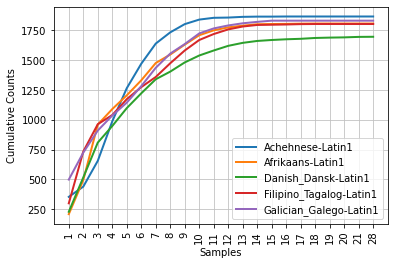

In [78]:
languages = ['Achehnese-Latin1', 'Afrikaans-Latin1', 'Danish_Dansk-Latin1', 'Filipino_Tagalog-Latin1', 'Galician_Galego-Latin1']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang))
cfd.plot(cumulative=True)